# Explortory Analysis of Iris Extended Dataset

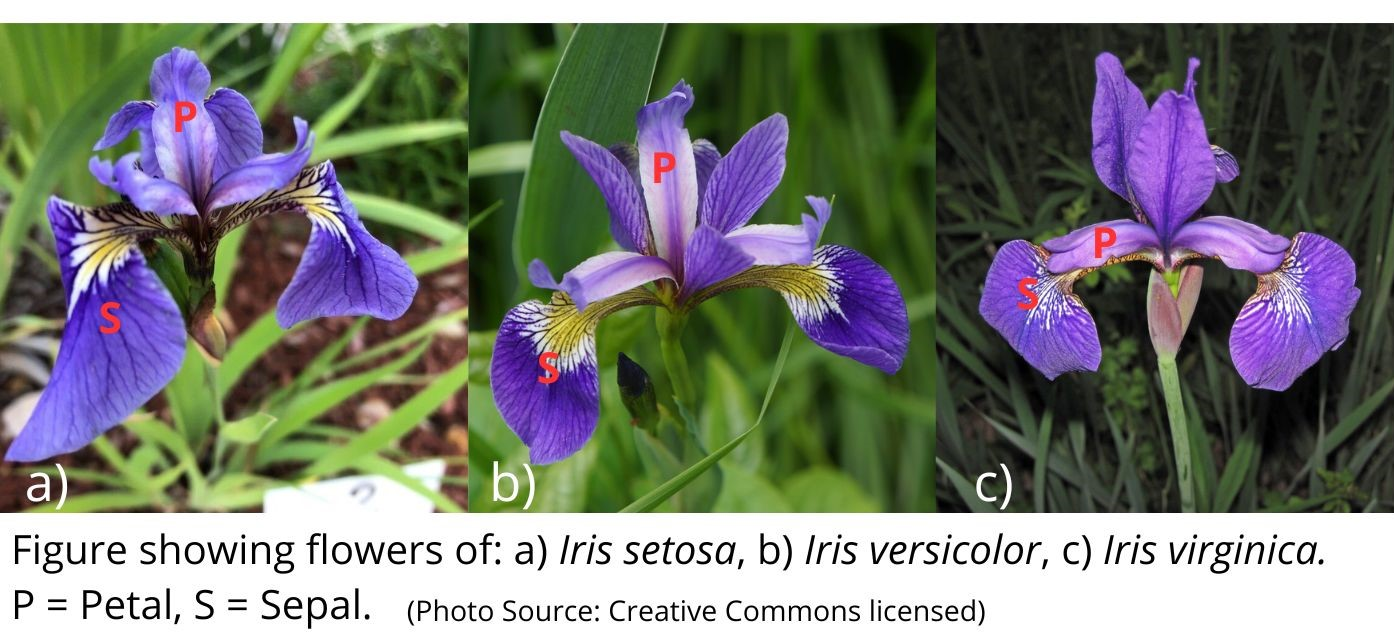


The dataset includes elevation, soil-type and morphological data from three species of Iris:

Iris setosa.
Native to:
Alaska, Aleutian Is., Amur, British Columbia, Irkutsk, Japan, Kamchatka, Khabarovsk, Korea, Krasnoyarsk, Kuril Is., Magadan, Manchuria, North European Russi, Primorye, Sakhalin, Yakutskiya, Yukon

Iris versicolor.
Native to: Central & E. Canada to N. Central & E. U.S.A. 
-It is a rhizomatous geophyte and grows primarily in the temperate biome.

  
Iris virginica.    
Native to: E. Canada to Central & E. U.S.A. 
-It is a rhizomatous geophyte and grows primarily in the temperate biome.

(source:plantsoftheworld.org)
    


In [59]:
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches


#plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
#plt.style.use('seaborn-v0_8-dark')
sns.set_style('white')

In [12]:
# Import data
data = pd.read_csv(r"C:\Users\Tori\Downloads\flowerset\iris_extended.csv")

In [13]:
data

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,9.000000,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,virginica,268.8,loamy,5.36,2.51,5.16,1.93,13.4536,9.9588,2.135458,2.673575,1.038760,1.300518,0.20,0.58,11.61,11.52,59.46,3.667915,3.155757,1.350926
1196,virginica,125.4,clay,7.49,3.06,7.68,2.17,22.9194,16.6656,2.447712,3.539171,0.975260,1.410138,-0.19,0.89,13.85,6.99,77.12,4.787421,4.082352,1.375252
1197,virginica,73.6,clay,6.79,3.25,4.72,2.26,22.0675,10.6672,2.089231,2.088496,1.438559,1.438053,2.07,0.99,13.13,9.16,74.39,4.697606,3.266068,2.068725
1198,virginica,239.6,sandy,6.38,2.24,5.30,1.71,14.2912,9.0630,2.848214,3.099415,1.203774,1.309942,1.08,0.53,11.01,6.46,73.90,3.780370,3.010482,1.576873


In [14]:
#check of missing values
data.isnull().sum() 

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

In [15]:
#Check datatypes for columns
print(data.dtypes)

species                             object
elevation                          float64
soil_type                           object
sepal_length                       float64
sepal_width                        float64
petal_length                       float64
petal_width                        float64
sepal_area                         float64
petal_area                         float64
sepal_aspect_ratio                 float64
petal_aspect_ratio                 float64
sepal_to_petal_length_ratio        float64
sepal_to_petal_width_ratio         float64
sepal_petal_length_diff            float64
sepal_petal_width_diff             float64
petal_curvature_mm                 float64
petal_texture_trichomes_per_mm2    float64
leaf_area_cm2                      float64
sepal_area_sqrt                    float64
petal_area_sqrt                    float64
area_ratios                        float64
dtype: object


In [16]:
# Find duplicates
print("Number of duplicated rows:",data.duplicated(keep=False).sum())

Number of duplicated rows: 0


In [17]:
#Find missing values pr column (NaN)
nan_per_column = data.isna().sum().sort_values(ascending = False)
print(nan_per_column)


species                            0
sepal_to_petal_length_ratio        0
petal_area_sqrt                    0
sepal_area_sqrt                    0
leaf_area_cm2                      0
petal_texture_trichomes_per_mm2    0
petal_curvature_mm                 0
sepal_petal_width_diff             0
sepal_petal_length_diff            0
sepal_to_petal_width_ratio         0
petal_aspect_ratio                 0
elevation                          0
sepal_aspect_ratio                 0
petal_area                         0
sepal_area                         0
petal_width                        0
petal_length                       0
sepal_width                        0
sepal_length                       0
soil_type                          0
area_ratios                        0
dtype: int64


In [18]:
#Shape of table
data.shape

(1200, 21)

In [19]:
data.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,17.870807,5.689068,2.003853,4.016732,1.996762,5.422667,2.08795,1.863317,8.355267,15.052733,60.144650,4.208441,2.106480,15.755674
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.388978,4.585312,0.507508,2.070668,1.035622,5.921786,1.27443,1.004847,3.172975,4.663109,10.224305,0.399956,1.119309,21.891577
min,50.100000,4.040000,1.700000,0.960000,0.050000,9.048000,0.086000,0.978774,1.587379,0.745902,0.841121,-1.55000,-0.340000,3.310000,3.830000,35.160000,3.007989,0.293258,0.818662
25%,110.875000,5.210000,2.690000,1.640000,0.360000,15.554550,0.565825,1.639104,2.855016,1.223277,1.650452,1.14000,1.090000,5.310000,11.280000,52.302500,3.943926,0.752213,2.005655
50%,171.300000,5.840000,3.030000,4.300000,1.290000,17.646400,5.525400,1.970738,3.448642,1.442773,2.170656,1.95500,1.590000,7.925000,15.020000,59.170000,4.200762,2.350617,3.059424
75%,239.125000,6.520000,3.390000,5.200000,1.740000,20.007275,9.256725,2.293932,4.486058,3.059940,9.251453,3.29000,2.740000,10.715000,18.527500,67.305000,4.472949,3.042487,30.764892
max,299.900000,9.120000,4.760000,7.840000,2.990000,29.722600,23.128000,4.082902,34.400000,5.410000,55.800000,4.66000,4.560000,17.890000,29.850000,86.930000,5.451844,4.809158,183.620930


In [20]:
data['species'].value_counts()

setosa        400
versicolor    400
virginica     400
Name: species, dtype: int64

# Environmental Factors

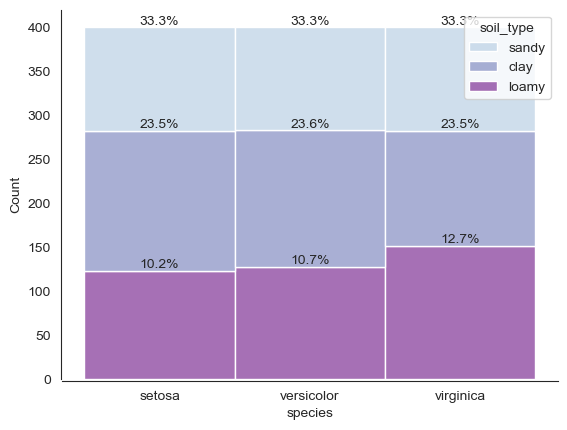

In [109]:
# Create the histogram plot
ax = sns.histplot(data=data, x='species', hue='soil_type', palette='BuPu', multiple="stack")

# Initialize a dictionary to store the cumulative height for each x position
cumulative_heights = dict()

# Annotate percentages
for p in ax.patches:
    # Extract information
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Update the cumulative height
    if x not in cumulative_heights:
        cumulative_heights[x] = 0
    cumulative_heights[x] += height

    # Calculate percentage
    percentage = '{:.1f}%'.format(100 * cumulative_heights[x] / total)

    # Annotate
    ax.annotate(percentage, (x, cumulative_heights[x]), ha='center', va='bottom')

# Remove the top and right spines from the plot and add some space between the spines and the axes
sns.despine(offset=1, trim=False)

plt.show()

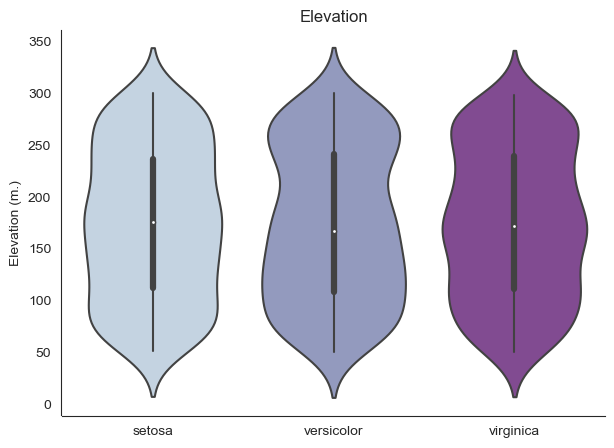

In [108]:
plt.figure(figsize=(7,5))
ax = sns.violinplot(data=data, x="species", y="elevation", palette = 'BuPu')
# Remove x label
ax.set_xlabel('')
ax.set_ylabel('Elevation (m.)')
ax.set_title('Elevation')

# Remove the top and right spines from the plot and add some space between the spines and the axes
sns.despine(offset=1, trim=False)

plt.show()


# Morphological variance within and between the species

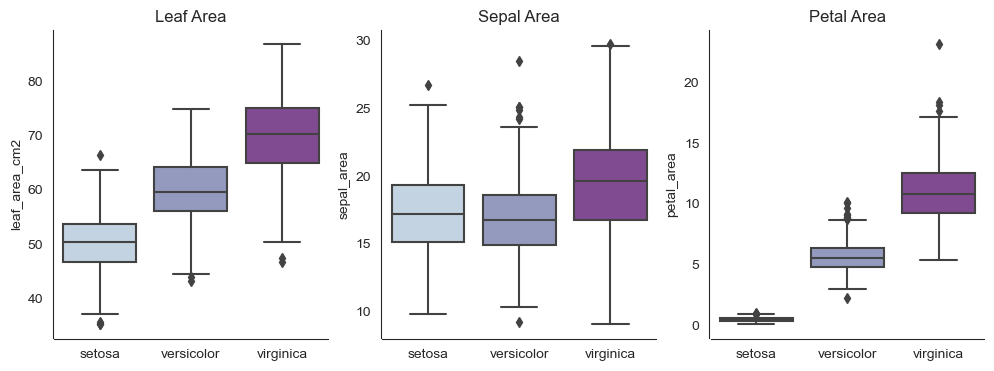

In [107]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))
ax1 = sns.boxplot(data = data, x = 'species', y = 'leaf_area_cm2', palette = 'BuPu' , ax = axs[0] )
ax1.set_xlabel('')
ax1.set_title('Leaf Area')

ax2 = sns.boxplot(data = data, x = 'species', y = 'sepal_area', palette = 'BuPu' , ax = axs[1] )
ax2.set_xlabel('')
ax2.set_title('Sepal Area')

ax3 = sns.boxplot(data = data, x = 'species', y = 'petal_area', palette = 'BuPu' , ax = axs[2] )
ax3.set_xlabel('')
ax3.set_title('Petal Area')

# Remove the top and right spines from the plot and add some space between the spines and the axes
sns.despine(offset=1, trim=False)

plt.show()

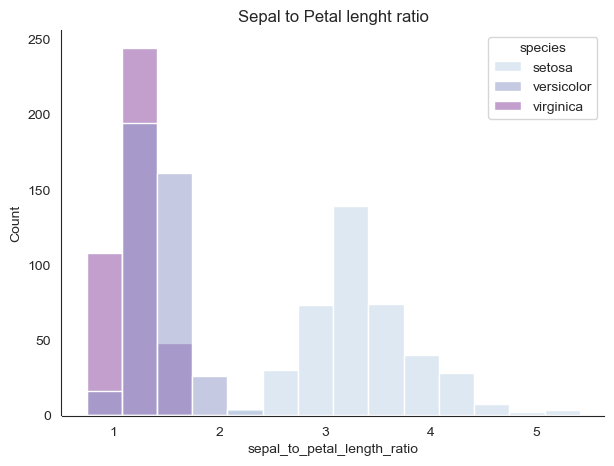

In [150]:
# Plot histogram showing the varianc in lenght ratio from sepal to petal within and between the species
plt.figure(figsize=(7,5))

ax= sns.histplot(data=data, x = 'sepal_to_petal_length_ratio', hue ='species', palette ='BuPu')

# Remove the top and right spines from the plot and add some space between the spines and the axes
sns.despine(offset=1, trim=False)

# Set title
ax.set_title('Sepal to Petal lenght ratio')


plt.show()

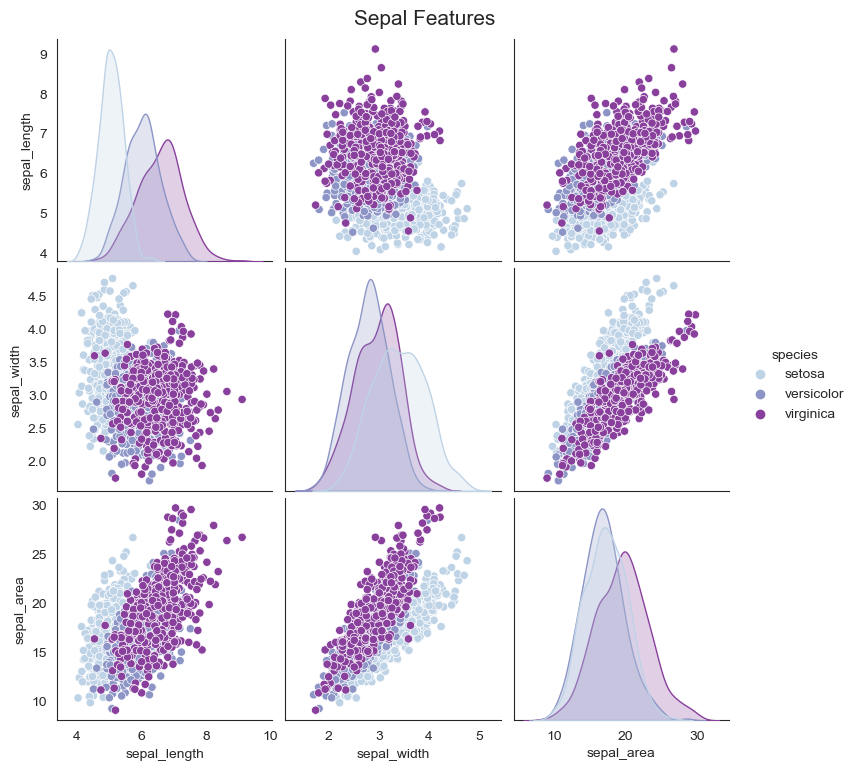

In [153]:
# Make a plot to show varience in sepal features wihin and between the species
data_sepal = data[['species','sepal_length', 'sepal_width','sepal_area']]
sns.pairplot(data = data_sepal, hue = 'species', palette ='BuPu')

# Adding a main title for all subplots
plt.suptitle('Sepal Features', fontsize=15, x = 0.5, y = 1.02)

plt.show()


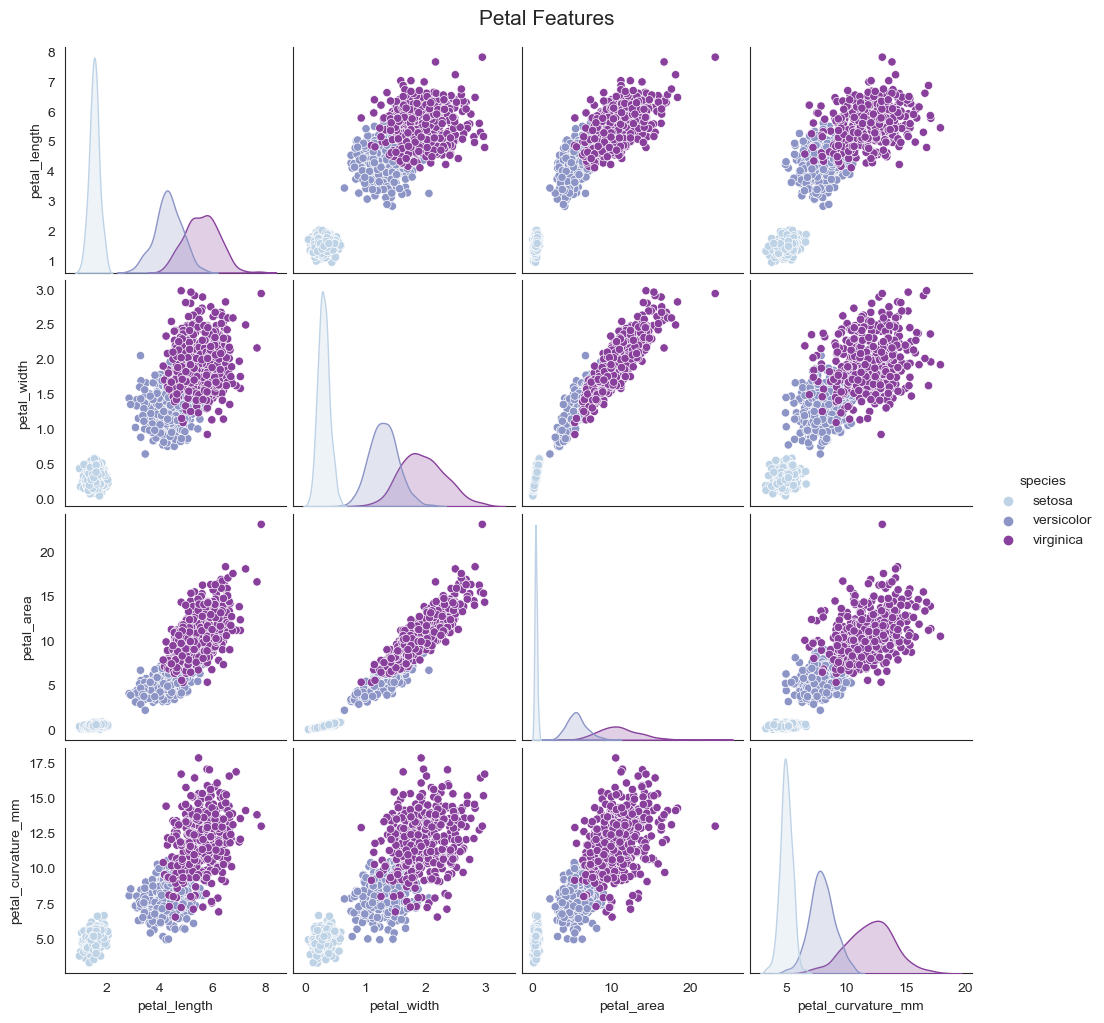

In [152]:
# Make a plot to show varience in petal features wihin and between the species
data_petal = data[['species','petal_length', 'petal_width','petal_area', 'petal_curvature_mm' ]]
sns.pairplot(data = data_petal, hue = 'species', palette ='BuPu')

# Adding a main title for all subplots
plt.suptitle('Petal Features', fontsize=15, x = 0.5, y = 1.02)

plt.show()


C:\Users\Tori\AppData\Local\Temp\ipykernel_20804\2260804310.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax =sns.heatmap(data_heat.corr(), annot=True,cmap='BuPu')


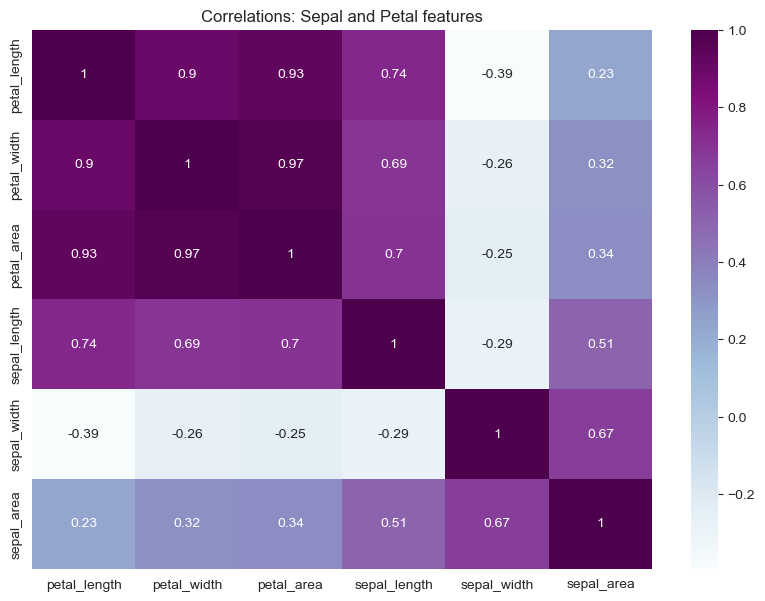

In [146]:
# Plot a heatmap showing correlation for flower features (sepal and petal)
data_heat = data[['species','petal_length', 'petal_width','petal_area', 'sepal_length', 'sepal_width','sepal_area']]
plt.figure(figsize=(10,7))
ax =sns.heatmap(data_heat.corr(), annot=True,cmap='BuPu') 

# Set title
ax.set_title('Correlations: Sepal and Petal features')

plt.show()

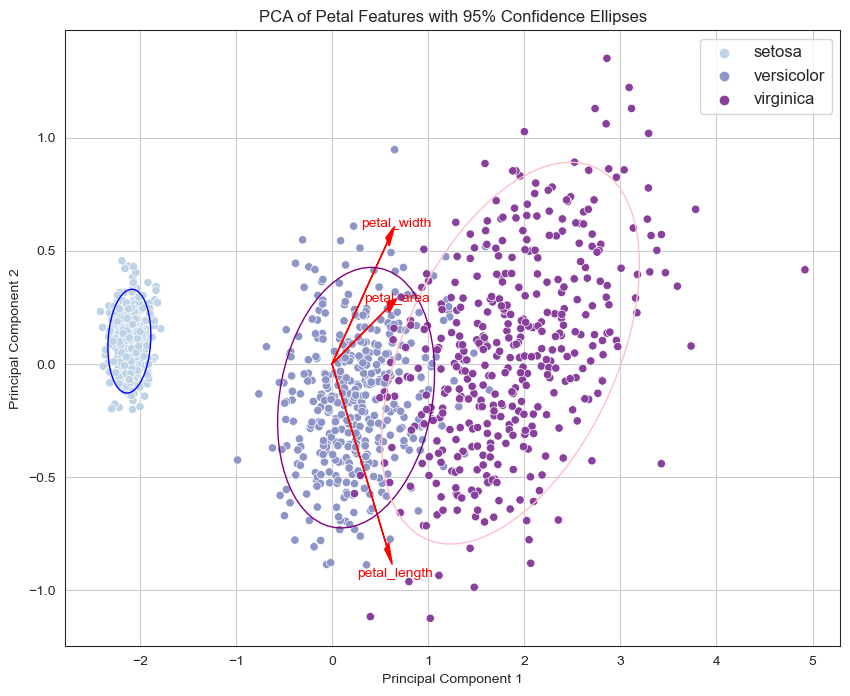

In [148]:
#INCLUDE 'petal_curvature_mm'

# Specifeing columns for PCA
pca_columns = ['petal_length', 'petal_width', 'petal_area']
pca_data = data[pca_columns]

# Standardizing the PCA data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Performing PCA
pca_for_plot = PCA()
pca_plot = pca_for_plot.fit_transform(pca_data_scaled)

# Createing a DataFrame with the PCA results for plotting
pca_plot_df = pd.DataFrame(data=iris_pca_plot, columns=['PCA1', 'PCA2', 'PCA3'])
pca_plot_df['species'] = data['species']

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=pca_plot_df, palette='BuPu', marker='o')

# Adding the feature vectors

for i, feature in enumerate(pca_columns):
    plt.arrow(0, 0, pca_for_plot.components_[0, i], pca_for_plot.components_[1, i], 
              color='r', head_width=0.05, head_length=0.1)
    plt.text(pca_for_plot.components_[0, i] * 1.15, 
             pca_for_plot.components_[1, i] * 1.15, 
             feature, color='r', ha='center', va='center')

# Define a color map for the species
species_colors = {'setosa': 'blue', 'versicolor': 'purple', 'virginica': 'pink'}

# Drawing 95% confidence ellipses
for species in pca_plot_df['species'].unique():
    species_data = pca_plot_df[pca_plot_df['species'] == species]
    mean = species_data[['PCA1', 'PCA2']].mean().values
    cov = np.cov(species_data[['PCA1', 'PCA2']], rowvar=False)
    lambda_, v = np.linalg.eig(cov)
    lambda_ = np.sqrt(lambda_)
    ell = patches.Ellipse(xy=(mean[0], mean[1]), 
                          width=lambda_[0]*2*1.96, height=lambda_[1]*2*1.96, 
                          angle=np.rad2deg(np.arccos(v[0, 0])),
                          edgecolor=species_colors[species])
    ell.set_facecolor('none')
    plt.gca().add_artist(ell)

# Adjust legend
plt.legend(fontsize='12')    
    

# Setting up the plot
plt.title('PCA of Petal Features with 95% Confidence Ellipses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
